In [1]:
%load_ext autoreload
%autoreload 2
import pickle

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# traigo mis funciones
import sys
sys.path.append('../../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_pickle('../../Datos_Mod3/df_estandarizado.pkl')

In [3]:
df.shape

(1568, 25)

In [4]:
df.head()

Age_robust  Attrition     BusinessTravel              Department  \
0    1.153846          0      Travel_Rarely                   Sales   
1   -0.384615          1  Travel_Frequently  Research & Development   
2   -0.307692          0  Travel_Frequently  Research & Development   
3    0.153846          0         Non-Travel  Research & Development   
4   -0.307692          0      Travel_Rarely  Research & Development   

   DistanceFromHome_robust Education EducationField  Gender JobLevel  \
0                -0.083333         2  Life Sciences  Female        1   
1                 0.250000         1  Life Sciences  Female        1   
2                 0.833333         4          Other    Male        4   
3                -0.416667         5  Life Sciences    Male        3   
4                 0.250000         1        Medical    Male        1   

                     JobRole MaritalStatus  MonthlyIncome_robust  \
0  Healthcare Representative       Married              1.512817   
1         Research Scientist        Single             -0.130517   
2            Sales Executive       Married              2.656358   
3            Human Resources       Married              0.630126   
4            Sales Executive        Single             -0.470523   

   NumCompaniesWorked_robust  PercentSalaryHike_robust StockOptionLevel  \
0                  -0.333333                 -0.500000                0   
1                  -0.666667                  1.500000                1   
2                  -0.333333                  0.166667                3   
3                   0.333333                 -0.500000                3   
4                   0.666667                 -0.333333                2   

   TotalWorkingYears_robust TrainingTimesLastYear  YearsAtCompany_robust  \
0                 -1.000000                     6              -0.666667   
1                 -0.444444                     3               0.000000   
2                 -0.555556                     2               0.000000   
3                  0.333333                     5               0.500000   
4                 -0.111111                     2               0.166667   

   YearsSinceLastPromotion_robust  YearsWithCurrManager_robust  \
0                       -0.333333                         -0.6   
1                        0.000000                          0.2   
2                       -0.333333                          0.0   
3                        2.000000                          0.4   
4                       -0.333333                          0.2   

  EnvironmentSatisfaction JobSatisfaction WorkLifeBalance JobInvolvement  \
0                     3.0             4.0             2.0              3   
1                     3.0             2.0             4.0              2   
2                     2.0             2.0             1.0              3   
3                     4.0             4.0             3.0              2   
4                     4.0             1.0             3.0              3   

  PerformanceRating  
0                 3  
1                 4  
2                 3  
3                 3  
4                 3

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age_robust                      1568 non-null   float64 
 1   Attrition                       1568 non-null   int64   
 2   BusinessTravel                  1568 non-null   object  
 3   Department                      1568 non-null   object  
 4   DistanceFromHome_robust         1568 non-null   float64 
 5   Education                       1568 non-null   category
 6   EducationField                  1568 non-null   object  
 7   Gender                          1568 non-null   object  
 8   JobLevel                        1568 non-null   category
 9   JobRole                         1568 non-null   object  
 10  MaritalStatus                   1568 non-null   object  
 11  MonthlyIncome_robust            1568 non-null   float64 
 12  NumCompaniesWorked_robust

In [6]:
lista_col_cat = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [7]:
lista_col_num = df.select_dtypes(include=[int, float]).columns.tolist()

In [8]:
len(lista_col_cat)

15

In [10]:
lista_col_cat

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating']

In [9]:
len(lista_col_num)

10

In [11]:
lista_col_num

['Age_robust',
 'Attrition',
 'DistanceFromHome_robust',
 'MonthlyIncome_robust',
 'NumCompaniesWorked_robust',
 'PercentSalaryHike_robust',
 'TotalWorkingYears_robust',
 'YearsAtCompany_robust',
 'YearsSinceLastPromotion_robust',
 'YearsWithCurrManager_robust']

In [12]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(str)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(str)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(str)

In [13]:
lista_ord, lista_des = f.detectar_orden_cat(df, lista_cat=df.select_dtypes(include=['object', 'category']), var_respuesta='Attrition')

Estamos evaluando la variable BUSINESSTRAVEL


Attrition            0    1
BusinessTravel             
Non-Travel         145   12
Travel_Frequently  219   77
Travel_Rarely      952  163

Sí tiene orden la variable BusinessTravel
Estamos evaluando la variable DEPARTMENT


Attrition                 0    1
Department                      
Human Resources          44   22
Research & Development  865  160
Sales                   407   70

Sí tiene orden la variable Department
Estamos evaluando la variable EDUCATION


Attrition    0   1
Education         
1          154  27
2          246  57
3          516  96
4          356  64
5           44   8

La variable Education no tiene orden
Estamos evaluando la variable EDUCATIONFIELD


Attrition           0    1
EducationField            
Human Resources    16   12
Life Sciences     544  108
Marketing         141   26
Medical           406   81
Other              80   10
Technical Degree  129   15

Sí tiene orden la variable EducationField
Estamos evaluando la variable GENDER


Attrition    0    1
Gender             
Female     523   95
Male       793  157

La variable Gender no tiene orden
Estamos evaluando la variable JOBLEVEL


Attrition    0    1
JobLevel           
1          500   87
2          464  104
3          197   32
4           93   17
5           62   12

La variable JobLevel no tiene orden
Estamos evaluando la variable JOBROLE


Attrition                    0   1
JobRole                           
Healthcare Representative  124  21
Human Resources             47   7
Laboratory Technician      232  46
Manager                     90  16
Manufacturing Director     141  16
Research Director           63  22
Research Scientist         252  54
Sales Executive            288  58
Sales Representative        79  12

La variable JobRole no tiene orden
Estamos evaluando la variable MARITALSTATUS


Attrition        0    1
MaritalStatus          
Divorced       319   37
Married        633   85
Single         364  130

Sí tiene orden la variable MaritalStatus
Estamos evaluando la variable STOCKOPTIONLEVEL


Attrition           0    1
StockOptionLevel          
0                 563  112
1                 541   97
2                 138   28
3                  74   15

La variable StockOptionLevel no tiene orden
Estamos evaluando la variable TRAININGTIMESLASTYEAR


Attrition                0    1
TrainingTimesLastYear          
0                       45   10
1                       64   11
2                      485  103
3                      428   90
4                      116   17
5                      112   17
6                       66    4

La variable TrainingTimesLastYear no tiene orden
Estamos evaluando la variable ENVIRONMENTSATISFACTION


Attrition                  0   1
EnvironmentSatisfaction         
1.0                      225  74
2.0                      257  45
3.0                      415  67
4.0                      400  62
Desconocido               19   4

Sí tiene orden la variable EnvironmentSatisfaction
Estamos evaluando la variable JOBSATISFACTION


Attrition          0   1
JobSatisfaction         
1.0              231  69
2.0              245  49
3.0              389  78
4.0              434  55
Desconocido       17   1

Sí tiene orden la variable JobSatisfaction
Estamos evaluando la variable WORKLIFEBALANCE


Attrition          0    1
WorkLifeBalance          
1.0               56   27
2.0              296   61
3.0              805  132
4.0              128   28
Desconocido       31    4

Sí tiene orden la variable WorkLifeBalance
Estamos evaluando la variable JOBINVOLVEMENT


Attrition         0    1
JobInvolvement          
1                71   19
2               330   62
3               788  144
4               127   27

La variable JobInvolvement no tiene orden
Estamos evaluando la variable PERFORMANCERATING


Attrition             0    1
PerformanceRating           
3                  1120  210
4                   196   42

La variable PerformanceRating no tiene orden


In [14]:
lista_ord

['BusinessTravel',
 'Department',
 'EducationField',
 'MaritalStatus',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [15]:
lista_des

['Education',
 'Gender',
 'JobLevel',
 'JobRole',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'JobInvolvement',
 'PerformanceRating']

In [16]:
diccionario_encoding = { "target": lista_ord, 
                        "onehot": lista_des} 
# En caso de que queramos aplicar el método solo a una columna
encoding = se.Encoding(df, variable_respuesta="Attrition", diccionario_encoding=diccionario_encoding)
df_resultado = encoding.one_hot_encoding()
df_resultado = encoding.target_encoding()

['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']


In [17]:
df_resultado.head()

Age_robust  Attrition  BusinessTravel  Department  DistanceFromHome_robust  \
0    1.153846          0        0.146188    0.146751                -0.083333   
1   -0.384615          1        0.260135    0.156098                 0.250000   
2   -0.307692          0        0.260135    0.156098                 0.833333   
3    0.153846          0        0.076433    0.156098                -0.416667   
4   -0.307692          0        0.146188    0.156098                 0.250000   

   EducationField  MaritalStatus  MonthlyIncome_robust  \
0        0.165644       0.118384              1.512817   
1        0.165644       0.263158             -0.130517   
2        0.111156       0.118384              2.656358   
3        0.165644       0.118384              0.630126   
4        0.166324       0.263158             -0.470523   

   NumCompaniesWorked_robust  PercentSalaryHike_robust  \
0                  -0.333333                 -0.500000   
1                  -0.666667                  1.500000   
2                  -0.333333                  0.166667   
3                   0.333333                 -0.500000   
4                   0.666667                 -0.333333   

   TotalWorkingYears_robust  YearsAtCompany_robust  \
0                 -1.000000              -0.666667   
1                 -0.444444               0.000000   
2                 -0.555556               0.000000   
3                  0.333333               0.500000   
4                 -0.111111               0.166667   

   YearsSinceLastPromotion_robust  YearsWithCurrManager_robust  \
0                       -0.333333                         -0.6   
1                        0.000000                          0.2   
2                       -0.333333                          0.0   
3                        2.000000                          0.4   
4                       -0.333333                          0.2   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Education_1  \
0                 0.139004         0.112474         0.170868          0.0   
1                 0.139004         0.166667         0.179487          1.0   
2                 0.149007         0.166667         0.325000          0.0   
3                 0.134199         0.112474         0.140875          0.0   
4                 0.134199         0.230000         0.140875          1.0   

   Education_2  Education_3  Education_4  Education_5  Gender_Female  \
0          1.0          0.0          0.0          0.0            1.0   
1          0.0          0.0          0.0          0.0            1.0   
2          0.0          0.0          1.0          0.0            0.0   
3          0.0          0.0          0.0          1.0            0.0   
4          0.0          0.0          0.0          0.0            0.0   

   Gender_Male  JobLevel_1  JobLevel_2  JobLevel_3  JobLevel_4  JobLevel_5  \
0          0.0         1.0         0.0         0.0         0.0         0.0   
1          0.0         1.0         0.0         0.0         0.0         0.0   
2          1.0         0.0         0.0         0.0         1.0         0.0   
3          1.0         0.0         0.0         1.0         0.0         0.0   
4          1.0         1.0         0.0         0.0         0.0         0.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                1.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      1.0   
4                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            0.0              0.0   
3                            0.0              0.0   
4                            0.0              0.0   

   JobRole_Manufactur

In [18]:
df_resultado.columns

Index(['Age_robust', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome_robust', 'EducationField', 'MaritalStatus',
       'MonthlyIncome_robust', 'NumCompaniesWorked_robust',
       'PercentSalaryHike_robust', 'TotalWorkingYears_robust',
       'YearsAtCompany_robust', 'YearsSinceLastPromotion_robust',
       'YearsWithCurrManager_robust', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Education_1', 'Education_2',
       'Education_3', 'Education_4', 'Education_5', 'Gender_Female',
       'Gender_Male', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2',

In [ ]:
df_resultado.to_pickle('../../Datos_Mod3/df_encoded.pkl')

## Balanceo

In [19]:
df_resultado['Attrition'].value_counts(normalize=True) * 100

Attrition
0    83.928571
1    16.071429
Name: proportion, dtype: float64

In [21]:
desbalanceo = spp.Desbalanceo(df_resultado,'Attrition')

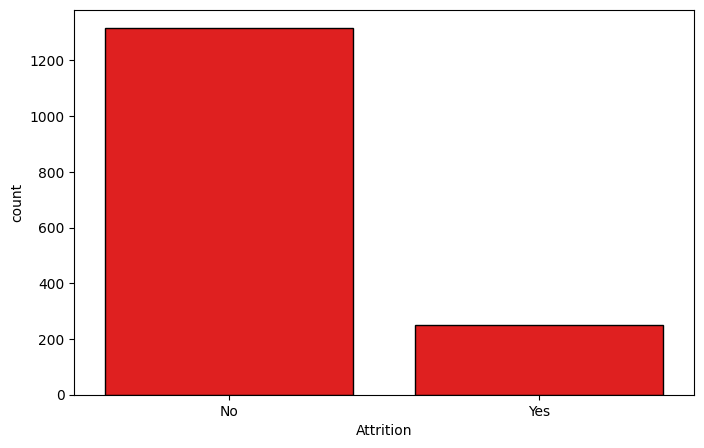

In [22]:
desbalanceo.visualizar_clase(color='red', edgecolor='black')

In [23]:
df_resultado.shape

(1568, 55)

## Tomek

In [24]:
df_tomek = desbalanceo.balancear_clases_tomek()

In [25]:
df_tomek.shape

(1510, 55)

## SmoteNC

In [26]:
balanceo = spp.Desbalanceo(df_tomek,'Attrition')

In [31]:
len(lista_col_num)

10

In [30]:
columnas_todas = df_tomek.columns

In [32]:
len(columnas_todas)

55

In [34]:
lista_categoricas = [col for col in columnas_todas if col not in lista_col_num]

In [45]:
df_balanceado = balanceo.balancear_clase_smotenc(lista_categoricas, sampling_strategy=0.8)

In [46]:
df_balanceado.shape

(2264, 55)

In [47]:
df_balanceado['Attrition'].value_counts(normalize=True) * 100

Attrition
0    55.565371
1    44.434629
Name: proportion, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

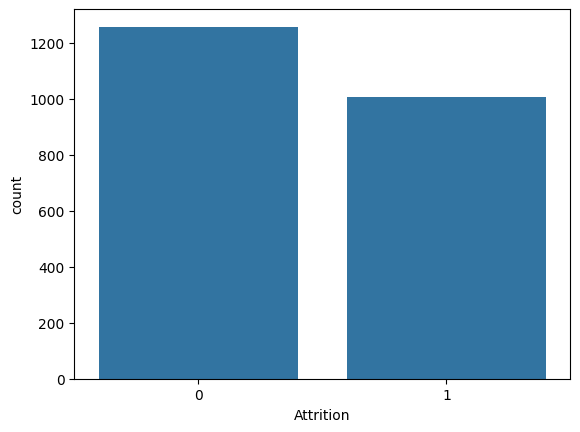

In [48]:
sns.countplot(x='Attrition', data=df_balanceado)

In [49]:
df_balanceado.to_pickle('../../Datos_Mod3/df_balanceado.pkl')